In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [2]:
import datajoint as dj
from pathlib import Path
import numpy as np

In [3]:
dj.config.load("dj_local_conf.json")

In [ ]:
dj.config

In [ ]:
dj.conn()

In [ ]:
dj.list_schemas()

In [9]:
# dj.schema("vathes-team_devlab_mila_kpmstest_kpms_pca").drop()

In [10]:
# from element_moseq import kpms_pca
from tutorial_pipeline import lab, subject, session, kpms_pca

[2024-03-08 03:53:37,997][WARNING]: lab.Project and related tables will be removed in a future version of Element Lab. Please use the project schema.


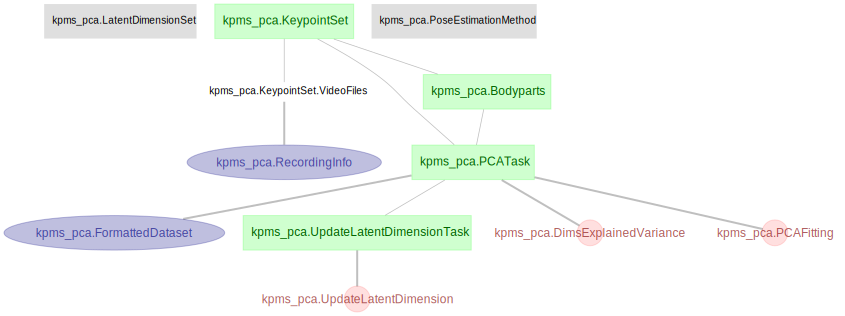

In [11]:
dj.Diagram(kpms_pca)
# + dj.Diagram(model)

In [12]:
kpms_pca.KeypointSet()

subject,session_datetime,kpset_id,"kpset_method deeplabcut, sleap, anipose, sleap-anipose, nwb, facemap",kpset_config_path Path relative to root data directory where the config file is located,kpset_videos_path Path relative to root data directory where the videos and their keypoints are located,kpset_description Optional. User-entered description


In [14]:
# Subject and Session tables
subject.Subject.insert1(
    dict(
        subject="subject1",
        sex="F",
        subject_birth_date="2020-01-01",
        subject_description="test",
    ),
    skip_duplicates=True,
)

# Definition of the dictionary named "session_keys"
session_keys = [
    dict(subject="subject1", session_datetime="2021-06-02 14:04:22"),
    dict(subject="subject1", session_datetime="2021-06-03 14:43:10"),
]

# Insert this dictionary in the Session table
session.Session.insert(session_keys, skip_duplicates=True)

In [13]:
kpset_key = dict(subject="subject1", 
                 session_datetime="2021-06-02 14:04:22", 
                 kpset_id=1)

kpms_pca.KeypointSet.insert1(
    {
        **kpset_key,
        "kpset_method":"deeplabcut",
        "kpset_config_path": "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data",
        "kpset_videos_path": "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos",
        "kpset_description": "testing kpms pca schema",
    },
    skip_duplicates=True,
)

In [15]:
kpms_pca.KeypointSet()

subject,session_datetime,kpset_id,"kpset_method deeplabcut, sleap, anipose, sleap-anipose, nwb, facemap",kpset_config_path Path relative to root data directory where the config file is located,kpset_videos_path Path relative to root data directory where the videos and their keypoints are located,kpset_description Optional. User-entered description
subject1,2021-06-02 14:04:22,1,deeplabcut,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos,testing kpms pca schema


In [16]:
video_files = [
    "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_11_8_one_mouse.top.ir.Mp4",
    "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_12_2_def6a_1.top.ir.mp4",
    "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_12_2_def6b_2.top.ir.mp4",
]

kpms_pca.KeypointSet.VideoFiles.insert(
    (
        {**kpset_key, "video_id": v_idx, "video_path": Path(f)}
        for v_idx, f in enumerate(video_files)
    ),
    skip_duplicates=True,
)

In [17]:
kpms_pca.KeypointSet.VideoFiles()

subject,session_datetime,kpset_id,video_id,"video_path Filepath of each video, relative to root data directory"
subject1,2021-06-02 14:04:22,1,0,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_11_8_one_mouse.top.ir.Mp4
subject1,2021-06-02 14:04:22,1,1,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_12_2_def6a_1.top.ir.mp4
subject1,2021-06-02 14:04:22,1,2,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_12_2_def6b_2.top.ir.mp4


In [18]:
kpms_pca.PoseEstimationMethod()

"format deeplabcut, sleap, anipose, sleap-anipose, nwb, facemap,",pose_estimation_desc Optional. Pose estimation method description
anipose,`.csv` files generated by anipose analysis
deeplabcut,`.csv` and `.h5/.hdf5` files generated by DeepLabcut analysis
facemap,`.h5` files generated by Facemap analysis
nwb,`.nwb` files with Neurodata Without Borders (NWB) format
sleap,`.slp` and `.h5/.hdf5` files generated by SLEAP analysis
sleap-anipose,`.h5/.hdf5` files generated by sleap-anipose analysis


In [19]:
kpms_pca.RecordingInfo()

subject,session_datetime,kpset_id,video_id,px_height Height in pixels,px_width Width in pixels,nframes Number of frames,"fps Optional. Frames per second, Hz",recording_datetime Optional. Datetime for the start of the recording,recording_duration Video duration (s) from nframes / fps


In [20]:
kpms_pca.RecordingInfo.populate()

In [21]:
kpms_pca.RecordingInfo()

subject,session_datetime,kpset_id,video_id,px_height Height in pixels,px_width Width in pixels,nframes Number of frames,"fps Optional. Frames per second, Hz",recording_datetime Optional. Datetime for the start of the recording,recording_duration Video duration (s) from nframes / fps
subject1,2021-06-02 14:04:22,1,0,576,640,71524,30,None,2384.13
subject1,2021-06-02 14:04:22,1,1,576,640,107507,30,None,3583.57
subject1,2021-06-02 14:04:22,1,2,576,640,107520,30,None,3584.0


In [22]:
kpms_pca.Bodyparts()

subject,session_datetime,kpset_id,bodyparts_id,anterior_bodyparts List of strings of anterior bodyparts,posterior_bodyparts List of strings of posterior bodyparts,use_bodyparts List of strings of bodyparts to be used


In [23]:
# Insert data in PCAInfo table
bodypart_key = {**kpset_key, "bodyparts_id": 1}
kpms_pca.Bodyparts.insert1(
    {
        **bodypart_key,
        "anterior_bodyparts": ["nose"],
        "posterior_bodyparts": ["spine2"],
        "use_bodyparts": [
            "spine4",
            "spine3",
            "spine2",
            "spine1",
            "head",
            "nose",
            "right ear",
            "left ear",
        ],
    },
    skip_duplicates=True,
)

In [25]:
kpms_pca.Bodyparts()

subject,session_datetime,kpset_id,bodyparts_id,anterior_bodyparts List of strings of anterior bodyparts,posterior_bodyparts List of strings of posterior bodyparts,use_bodyparts List of strings of bodyparts to be used
subject1,2021-06-02 14:04:22,1,1,=BLOB=,=BLOB=,=BLOB=


In [24]:
kpms_pca.PCATask()

subject,session_datetime,kpset_id,bodyparts_id,pca_task_id,project_path KPMS's project_path in config relative to root,"task_mode 'load': load computed analysis results, 'trigger': trigger computation",variance_threshold Variance threshold to be explained by the PCA model


In [26]:
kpms_pca.PCATask.insert1(
    {
        **bodypart_key,
        "pca_task_id": 1,
        "project_path": "/Users/milagros/Documents/datajoint-elements/element-moseq/data/outbox/kpms_project",
        "task_mode": "load",
        "variance_threshold": 0.90,
    },
    skip_duplicates=True,
)

In [27]:
kpms_pca.PCATask()

subject,session_datetime,kpset_id,bodyparts_id,pca_task_id,project_path KPMS's project_path in config relative to root,"task_mode 'load': load computed analysis results, 'trigger': trigger computation",variance_threshold Variance threshold to be explained by the PCA model
subject1,2021-06-02 14:04:22,1,1,1,/Users/milagros/Documents/datajoint-elements/element-moseq/data/outbox/kpms_project,load,0.9


In [28]:
key = (kpms_pca.PCATask).fetch1("KEY")
key

{'subject': 'subject1',
 'session_datetime': datetime.datetime(2021, 6, 2, 14, 4, 22),
 'kpset_id': 1,
 'bodyparts_id': 1,
 'pca_task_id': 1}

In [29]:
kpms_pca.FormattedDataset()

subject,session_datetime,kpset_id,bodyparts_id,pca_task_id,coordinates,confidences,formatted_bodyparts


In [30]:
kpms_pca.FormattedDataset.populate(key)

ACTION REQUIRED: `anterior_bodyparts` contains n which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `anterior_bodyparts` contains o which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `anterior_bodyparts` contains s which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `anterior_bodyparts` contains e which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains s which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains p which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains i which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains n which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains e which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains 4 which is 

Loading keypoints: 100%|████████████████| 10/10 [00:01<00:00,  9.31it/s]


In [31]:
kpms_pca.FormattedDataset()

subject,session_datetime,kpset_id,bodyparts_id,pca_task_id,coordinates,confidences,formatted_bodyparts
subject1,2021-06-02 14:04:22,1,1,1,=BLOB=,=BLOB=,=BLOB=


In [32]:
kpms_pca.PCAFitting()

subject,session_datetime,kpset_id,bodyparts_id,pca_task_id,pca_fitting_time Time of generation of the PCA fitting analysis


In [33]:
kpms_pca.PCAFitting.populate(key)

ACTION REQUIRED: `anterior_bodyparts` contains n which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `anterior_bodyparts` contains o which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `anterior_bodyparts` contains s which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `anterior_bodyparts` contains e which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains s which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains p which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains i which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains n which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains e which is not one of
  the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains 4 which is 

In [34]:
kpms_pca.PCAFitting()

subject,session_datetime,kpset_id,bodyparts_id,pca_task_id,pca_fitting_time Time of generation of the PCA fitting analysis


In [35]:
kpms_pca.LatentDimensionSet()

latent_dim,latent_dim_description


In [36]:
kpms_pca.LatentDimensionSet.insert1({"latent_dim":3, "latent_dim_description":"testing"}, skip_duplicates=True)

In [37]:
kpms_pca.LatentDimensionSet()

latent_dim,latent_dim_description
3,testing


In [38]:
kpms_pca.DimsExplainedVariance.populate(key)

In [39]:
kpms_pca.DimsExplainedVariance()

subject,session_datetime,kpset_id,bodyparts_id,pca_task_id,variance_percentage,dims_explained_variance
subject1,2021-06-02 14:04:22,1,1,1,90.0,4


In [40]:
# TO-DO: Plotting before choosing the latent dimensions to use 
# plot_scree(pca, project_dir=project_path) # --> both functions to plot outside the pipeline
# plot_pcs(pca, project_dir=project_path, **config())

In [41]:
kpms_pca.UpdateLatentDimensionTask.insert1({
    **key,
    "latent_dim": 5}, skip_duplicates=True)

In [42]:
kpms_pca.UpdateLatentDimensionTask()

subject,session_datetime,kpset_id,bodyparts_id,pca_task_id,latent_dim
subject1,2021-06-02 14:04:22,1,1,1,5


In [43]:
kpms_pca.UpdateLatentDimension.populate(key)